# ***Processing with RN data in stem woody biomass for forest sites***

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load biomass dataset
site_data = './../02_input_data/RN_sites_data_2024.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.792857,-0.232112,8.990000,2.196113,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.565517,0.448216,24.191919,3.186019,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.431579,-0.840305,6.800000,1.916923,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.123529,-2.091276,2.460000,0.900161,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.221212,-1.508633,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


In [11]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0" is nutural stand, "1" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,...,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,26.060965,...,49.081648,1,2,3.524231,5.926403,249,2800.0,1000.000000,7.705262,9.103868
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,4.494076,...,9.682612,1,2,3.830667,6.018960,249,2900.0,990.000000,8.420682,10.083724
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,28.142898,...,54.703060,1,2,0.483571,13.046428,189,380.0,90.000000,5.099866,6.416732
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,14.953551,...,40.420188,2,2,0.364500,12.741627,189,340.0,150.000000,3.737670,5.910797
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,7.208435,...,2.120687,2,2,0.333333,12.893213,189,330.0,69.993095,4.290459,6.139885


# Pre-analysis of parameters

In [12]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   D_live_cm      209 non-null    float64
 10  H_live_m       209 non-null    float64
 11  G_live_m2_ha   209 non-null    float64
 12  F_Soil_ID      209 non-null    int64  
 13  M_Soil         209 non-null    int64  
 14  AEDR_mean      209 non-null    float64
 15  Distance_km    209 non-null    float64
 16  Azimuth        209 non-null    int64  
 17  Cs_2021_kBq_m  209 non-null    float64
 18  Sr_2021_kB

In [13]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])['ln_A_Cs', 'ln_A_Sr'].describe()

/tmp/ipykernel_4121/2399527563.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])['ln_A_Cs', 'ln_A_Sr'].describe()


ln_A_Cs                                                    \
                 count      mean       std       min       25%       50%   
Species Origin                                                             
Alder   n         13.0  6.249674  1.661129  3.295837  5.840642  6.040255   
Aspen   n          9.0  5.584313  3.039601  2.708050  3.295837  4.204693   
Birch   a          8.0  4.362177  2.328619  2.564949  2.827543  3.233849   
        n         37.0  6.034944  2.148756  2.079442  4.488636  6.363028   
Oak     a          4.0  8.028237  2.843374  3.891820  7.345698  9.021902   
        n          3.0  5.397258  2.735149  2.397895  4.219075  6.040255   
Pine    a         79.0  6.394467  1.794226  1.526056  5.172417  6.811244   
        n         51.0  5.557900  2.118875  1.504077  3.783156  5.659482   
Red oak a          3.0  3.445685  0.588708  2.833213  3.164860  3.496508   
Robinia n          1.0  4.394449       NaN  4.394449  4.394449  4.394449   
Spruce  a          1.0  5.176150       NaN  5.176150  5.176150  5.176150   

                                    ln_A_Sr                                \
                     75%        max   count      mean       std       min   
Species Origin                                                              
Alder   n       6.940222   9.287301    13.0  6.055811  1.449620  4.094345   
Aspen   n       6.729824  11.366743     9.0  7.575485  2.597130  4.615121   
Birch   a       5.514399   9.296518     8.0  6.723859  2.848366  3.401197   
        n       7.306531  10.332018    37.0  7.876554  2.178501  2.660260   
Oak     a       9.704441  10.177324     4.0  8.028961  3.011778  3.931826   
        n       6.896939   7.753624     3.0  6.067628  1.994720  3.871201   
Pine    a       7.413919  10.468801    79.0  7.586615  1.908352  2.406945   
        n       6.951761  10.328755    51.0  7.291517  1.863717  4.317488   
Red oak a       3.751920   4.007333     3.0  4.697638  0.334751  4.418841   
Robinia n       4.394449   4.394449     1.0  7.265430       NaN  7.265430   
Spruce  a       5.176150   5.176150     1.0  7.783224       NaN  7.783224   

                                                         
                     25%       50%       75%        max  
Species Origin                                           
Alder   n       4.442651  6.302619  7.286192   7.649693  
Aspen   n       5.209486  7.870930  8.881836  11.180246  
Birch   a       5.087325  5.586554  8.559757  11.957611  
        n       6.873164  7.824046  8.995909  13.864301  
Oak     a       7.072729  8.529114  9.485347  11.125791  
        n       5.218233  6.565265  7.165841   7.766417  
Pine    a       6.293930  8.022897  8.896975  11.378251  
        n       6.107615  6.917706  8.327879  12.687263  
Red oak a       4.512005  4.605170  4.837037   5.068904  
Robinia n       7.265430  7.265430  7.265430   7.265430  
Spruce  a       7.783224  7.783224  7.783224   7.783224

In [14]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["ln_A_Cs"], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  D_live_cm  ...  G_live_m2_ha  F_Soil_ID  \
0        a          1    

In [16]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,1.918660,2.220096,2.526858,14.640059,174.296651,2588.391812,738.540435,5.964225,7.381811
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,0.634039,0.692944,4.756383,12.363729,99.912885,4938.371798,1556.255010,2.095016,2.042856
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,1.000000,0.000000,0.110000,3.998568,9.000000,22.000000,1.000000,1.504077,2.406945
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,2.000000,2.000000,0.460000,6.562497,56.000000,390.000000,29.466637,4.110874,5.752573
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,2.000000,2.000000,0.756000,9.203749,189.000000,710.000000,210.000000,6.309918,7.506592
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,2.000000,3.000000,2.401667,20.865459,261.000000,2400.000000,620.000000,7.306531,8.846497
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,3.000000,4.000000,36.591739,57.286577,342.000000,35200.000000,10500.000000,11.366743,13.864301


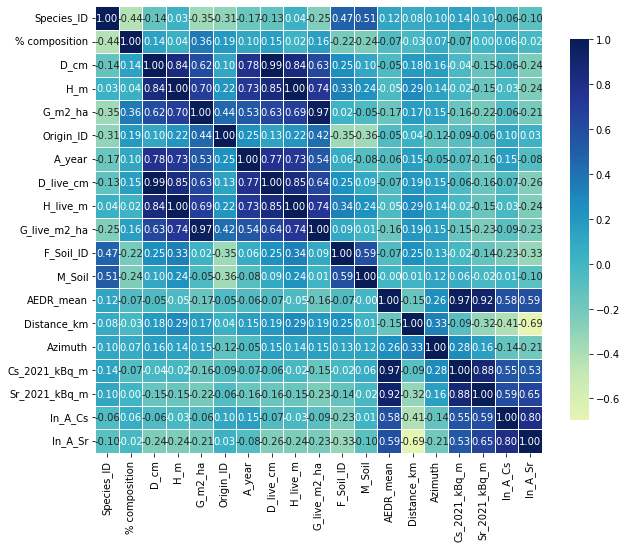

In [17]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [18]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m'])
y = pd.DataFrame(select, columns= ['ln_A_Cs'])

In [21]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value_1 = np.random.normal(10, 2, size=count)
    norm_value_2 = np.random.normal(10, 2, size=count)
    norm_value_3 = np.random.normal(10, 2, size=count)
    norm_value_4 = np.random.normal(10, 2, size=count)
    norm_value_5 = np.random.normal(10, 2, size=count)
    X['Random_col_1'], X['Random_col_2'], X['Random_col_3'], X['Random_col_4'], X['Random_col_5'] = norm_value_1, norm_value_2, norm_value_3, norm_value_4, norm_value_5
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [22]:
# Columns in "X" data collections
X.head()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,...,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Random_col_1,Random_col_2,Random_col_3,Random_col_4,Random_col_5
0,0,100.000000,26.060965,25.423284,49.081648,1,68,26.060965,25.423284,49.081648,...,2,3.524231,5.926403,249,2800.0,12.707199,9.993635,10.174019,9.174523,7.876792
1,0,90.178571,4.303100,4.705979,8.731641,0,15,4.494076,4.874017,9.682612,...,2,3.830667,6.018960,249,2900.0,13.886323,7.852220,10.294971,8.783904,10.614434
2,0,100.000000,28.142898,27.556869,54.703060,0,69,28.142898,27.556869,54.703060,...,2,0.483571,13.046428,189,380.0,11.920747,9.767274,10.724965,11.785627,9.850019
3,0,100.000000,14.953551,8.506028,40.420188,0,15,14.953551,8.506028,40.420188,...,2,0.364500,12.741627,189,340.0,13.400620,11.231239,12.980445,9.329926,6.665490
4,0,100.000000,7.208435,3.425669,2.120687,0,10,7.208435,3.425669,2.120687,...,2,0.333333,12.893213,189,330.0,9.559413,8.991105,8.903728,8.869408,10.971970


In [23]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.705262
1,8.420682
2,5.099866
3,3.737670
4,4.290459


# Create first XGBoost model for estimate varibiality of output stats

In [24]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [25]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [26]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [27]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7695876912338021, 0.7493760891288089, 0.7238473156536509]
    Mean: 0.748
    Std: 0.019

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.9336512  0.90867219 0.77778532]
    Mean: 0.873
    Std: 0.068

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7579667705039579, 0.7384443882281752, 0.8039492686292403]
    Mean: 0.767
    Std: 0.027

 --------------------


# Find optimal hyperparameters for XGBoost model

In [28]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [29]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y, eval_metric="rmse")

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/di

Model with rank: 1
Mean validation score: 0.615 (std: 0.075)
Parameters: {'colsample_bytree': 0.5616063402504361, 'gamma': 0.3561167041992971, 'learning_rate': 0.17921995818285888, 'max_depth': 2, 'n_estimators': 174, 'subsample': 0.6049840937273915}



In [30]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.92376916, 0.62138812, 0.61918672, 0.48390881, 1.05557156,
       0.24893792, 0.66484618, 0.7090137 , 0.48734713, 0.69302138]), 'std_fit_time': array([0.18658857, 0.04250512, 0.05874644, 0.02921065, 0.24344635,
       0.05774752, 0.14718257, 0.13255899, 0.10277163, 0.05528995]), 'mean_score_time': array([0.01032273, 0.00709065, 0.00923085, 0.00659808, 0.01017793,
       0.01011348, 0.00669154, 0.00692717, 0.00733956, 0.00919366]), 'std_score_time': array([2.44813652e-03, 5.35664891e-04, 3.81548385e-03, 6.36565204e-05,
       4.24626250e-03, 3.35375109e-03, 4.86359617e-05, 5.40596672e-04,
       1.16716884e-03, 3.88717380e-03]), 'param_colsample_bytree': masked_array(data=[0.3170874220746011, 0.3260530183998446,
                   0.8966799667414578, 0.168642862048561,
                   0.8127508562250333, 0.25273542678073296,
                   0.39622741389238697, 0.3088880426699251,
                   0.5868545819649728, 0.5616063402504361],
             ma

In [31]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.5616063402504361
Gamma: 0.3561167041992971
Learning_rate: 0.17921995818285888
Max_depth: 2
N_estimators: 174
Subsample: 0.6049840937273915


# Creating a basic XGBoost model

In [32]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [33]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [35]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5616063402504361, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.3561167041992971, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.17921995818285888, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=174, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [36]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:4.89656	validation_1-rmse:4.78813
[1]	validation_0-rmse:4.12612	validation_1-rmse:4.02700
[2]	validation_0-rmse:3.46749	validation_1-rmse:3.37270
[3]	validation_0-rmse:2.90706	validation_1-rmse:2.80831


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:2.48564	validation_1-rmse:2.37915
[5]	validation_0-rmse:2.13751	validation_1-rmse:2.07867
[6]	validation_0-rmse:1.87833	validation_1-rmse:1.90103
[7]	validation_0-rmse:1.63631	validation_1-rmse:1.68093
[8]	validation_0-rmse:1.43939	validation_1-rmse:1.50394
[9]	validation_0-rmse:1.28631	validation_1-rmse:1.34286
[10]	validation_0-rmse:1.16551	validation_1-rmse:1.24389
[11]	validation_0-rmse:1.06083	validation_1-rmse:1.13822
[12]	validation_0-rmse:0.97497	validation_1-rmse:1.07110
[13]	validation_0-rmse:0.92297	validation_1-rmse:1.03541
[14]	validation_0-rmse:0.87797	validation_1-rmse:1.01046
[15]	validation_0-rmse:0.84287	validation_1-rmse:1.00053
[16]	validation_0-rmse:0.80589	validation_1-rmse:1.00792
[17]	validation_0-rmse:0.77667	validation_1-rmse:0.99008
[18]	validation_0-rmse:0.75024	validation_1-rmse:0.96999
[19]	validation_0-rmse:0.73387	validation_1-rmse:0.97023
[20]	validation_0-rmse:0.71941	validation_1-rmse:0.97964
[21]	validation_0-rmse:0.70386	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [37]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 121


In [38]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

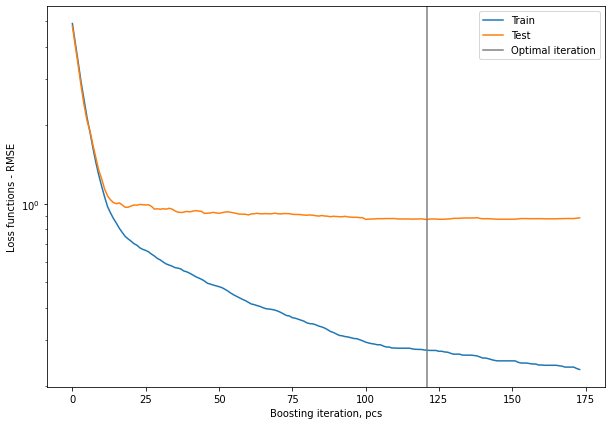

In [41]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

In [42]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.20
RMSE: 0.9
Relative RMSE(%):  0.150
MSE: 0.8
R square: 84.8%


In [43]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [44]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = np.float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

/tmp/ipykernel_4121/3744225160.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test_convert[i] = np.float(x_test_conv[i])


Optimal values of regression parameters
a0: 1.044
a1: 0.825
R^2: 0.848
Uncertainty
a0: 1.04+/-0.34
a1: 0.83+/-0.06


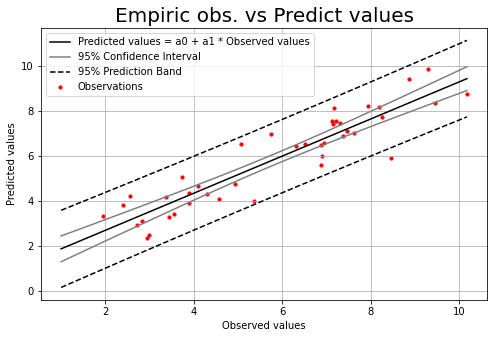

In [45]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


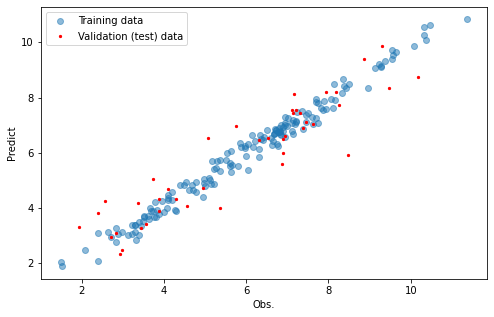

In [46]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.legend(loc='best')

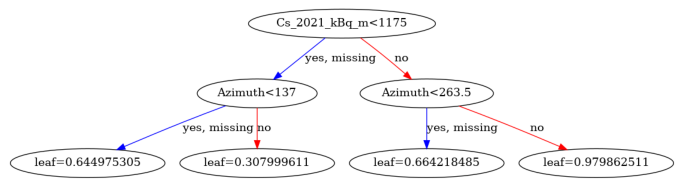

In [48]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

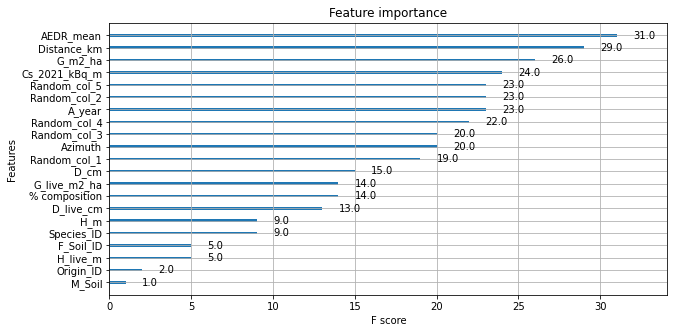

In [50]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

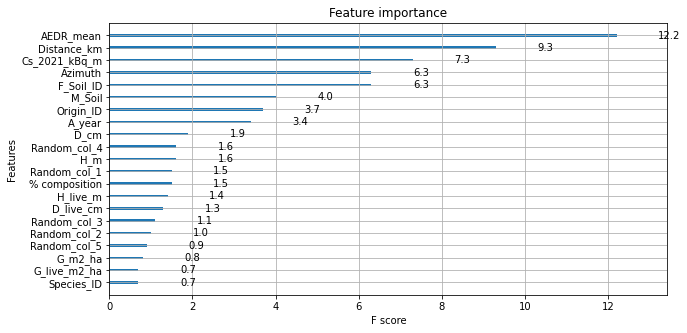

In [52]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

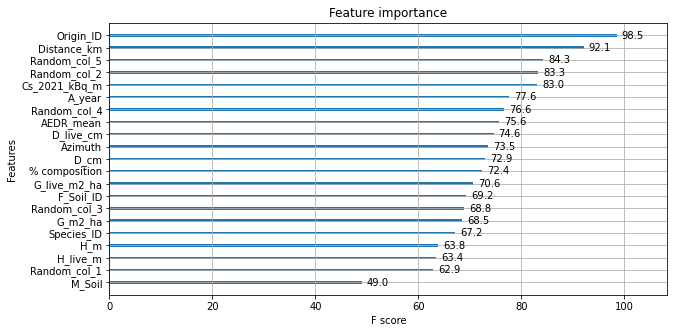

In [53]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [54]:
# Load SHAP`s library
import shap

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


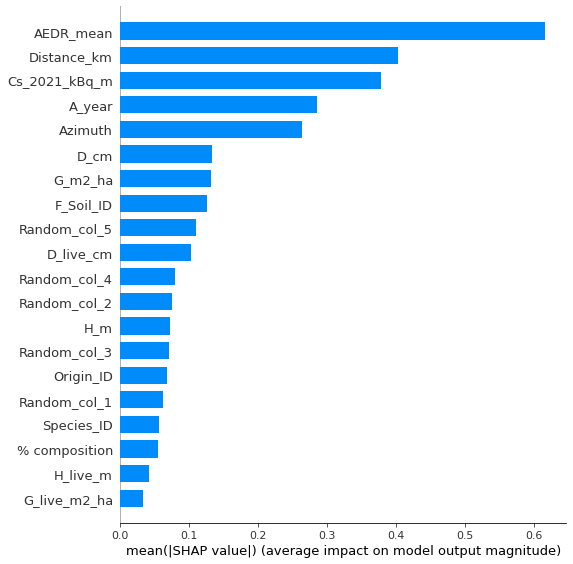

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

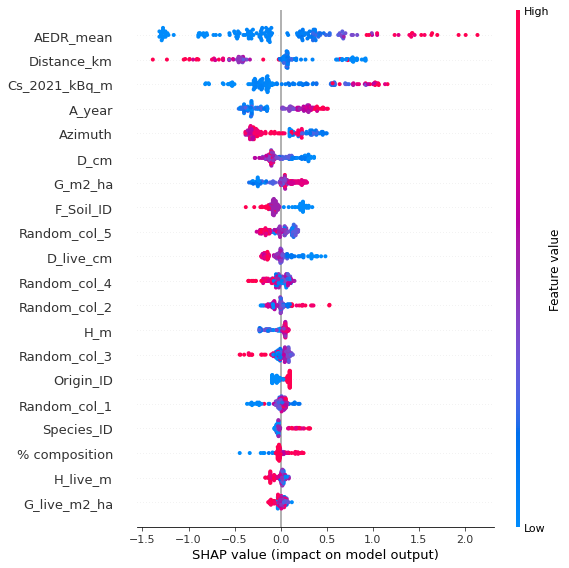

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

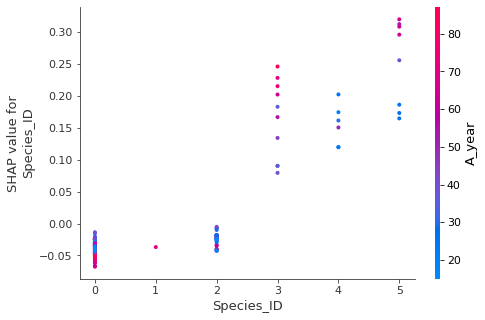

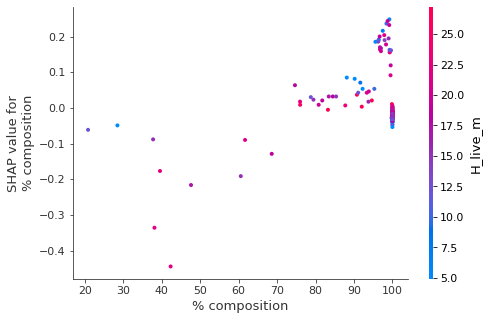

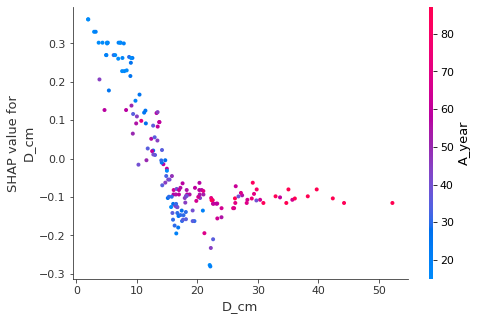

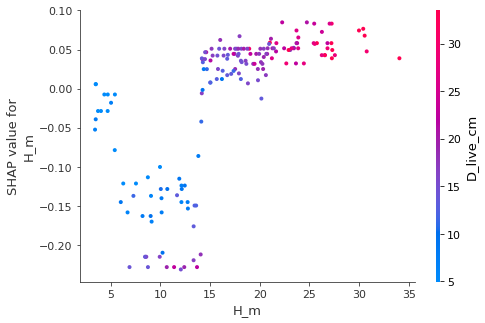

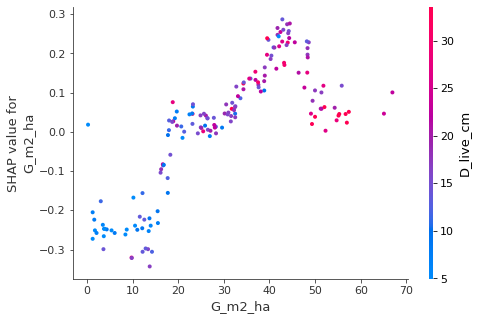

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


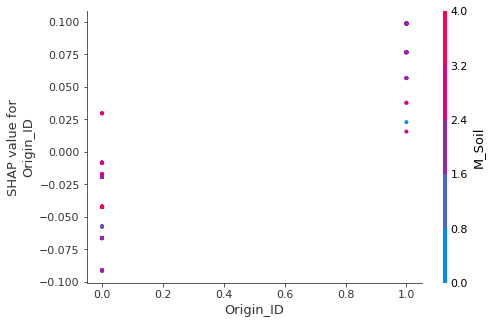

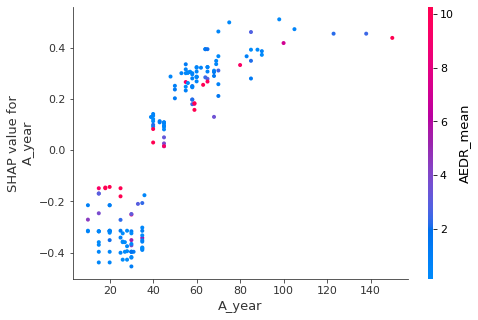

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


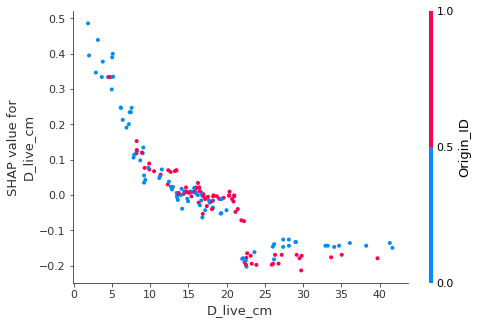

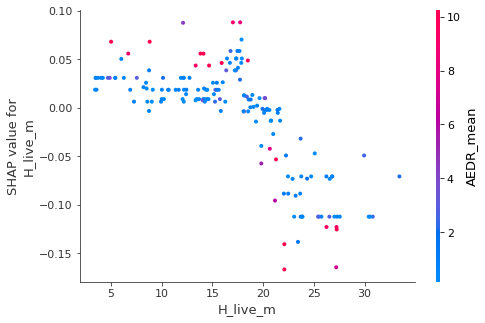

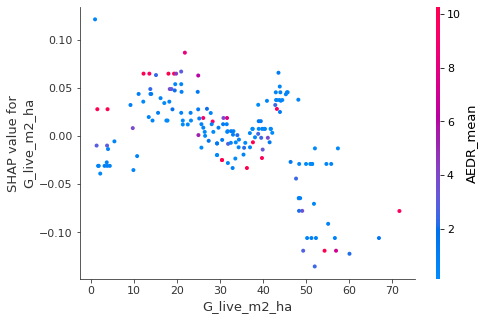

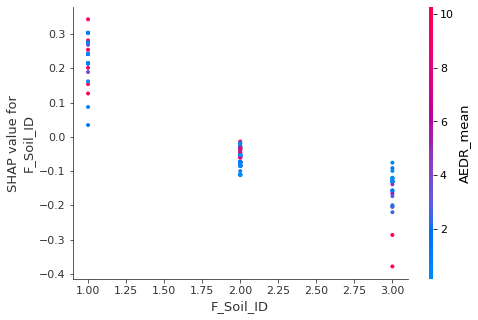

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


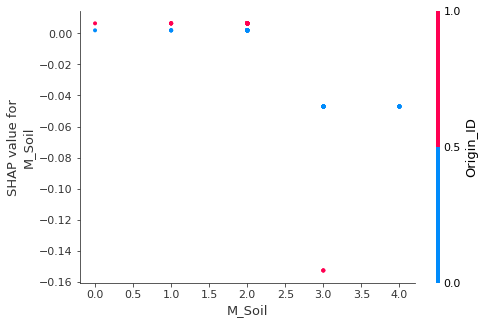

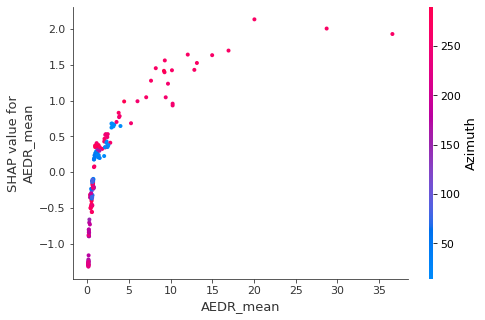

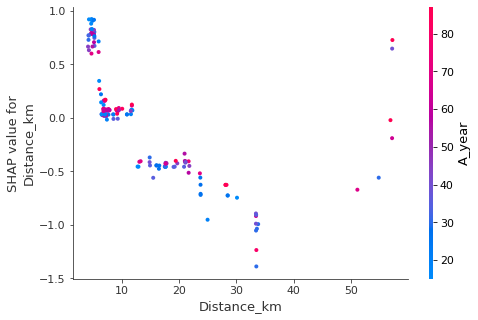

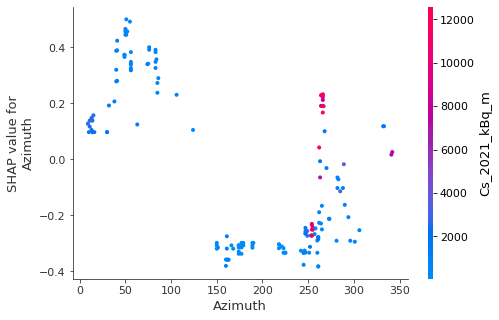

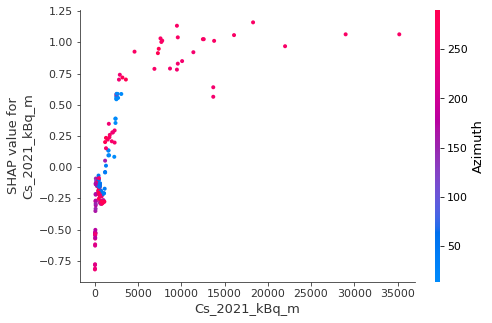

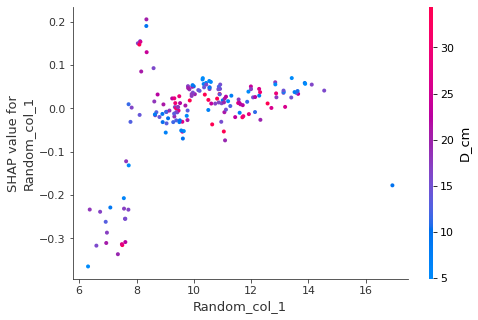

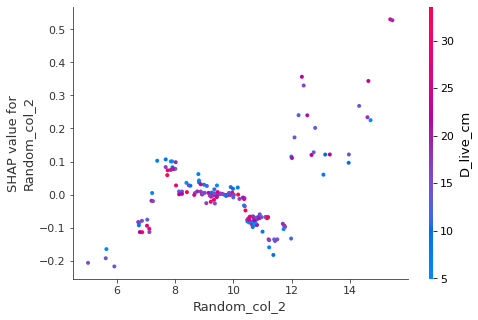

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


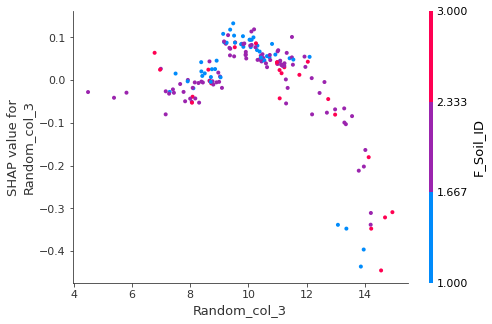

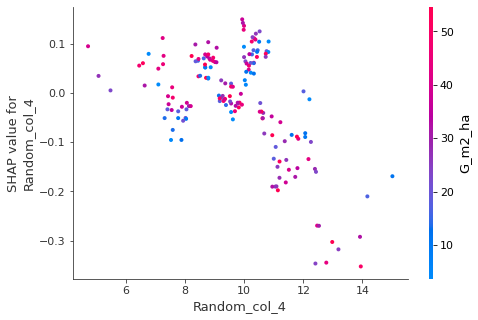

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


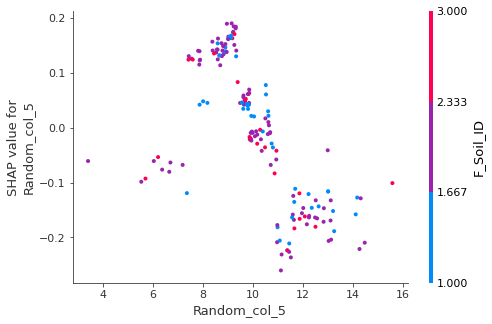

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)